<H1><CENTER> Machine Learning Lab - Exercise Sheet 5 <br /></CENTER></H1>
<H2><CENTER> Author: Sebastian Pineda Arango  <br />
ID: 246098<br />
Universität Hildesheim - Data Analytics Master </CENTER></H2>

<img src="https://www.uni-hildesheim.de/typo3conf/ext/unihildesheim/Resources/Public/Images/logo-uni.svgz" width="100">

## Exercise Sheet 5

In this exercise, we are going to use two datasets: Bank Marketing and Wine Quality. They are taken from the following pages:

* Bank Marketing (https://archive.ics.uci.edu/ml/datasets/Bank+Marketing)
* Wine Quality (http://archive.ics.uci.edu/ml/datasets/Wine+Quality)

Throughgout the notebook, we refer to Mank Marketing as _dataset1_ and Wine Quality for red wine as _dataset2_ and for white wine as _dataset3_. We want to perform the following operations:

* Loading datasets
* Preprocessing (encoding categorical values)
* Train/test splitting
* Data Normalization
* Regularization (Ridge regression) with BGD for regression
* Regularization for logistic regression
* Hyperparameter tuning

### Loading datasets

Datasets are loaded and importatn libraries are loaded. Following operations are also performed:

* Drop NA values
* Check the size before and after dropping NA values
* Showing the first five rows to check variables type and names

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

#reading bank marketing dataset
dataset1 = pd.read_csv("bank-full.csv", sep=";")
print("Size of dataset1 before dropping NA:", dataset1.shape)
dataset1 = dataset1.dropna()
print("Size of dataset1 after dropping NA:", dataset1.shape)
dataset1.head()

Size of dataset1 before dropping NA: (45211, 17)
Size of dataset1 after dropping NA: (45211, 17)


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [2]:
#reading red wine dataset
dataset2 = pd.read_csv("winequality-red.csv", sep=";")
print("Size of dataset2 before dropping NA:", dataset2.shape)
dataset2 = dataset2.dropna()
print("Size of dataset2 after dropping NA:", dataset2.shape)
dataset2.head()

Size of dataset2 before dropping NA: (1599, 12)
Size of dataset2 after dropping NA: (1599, 12)


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [3]:
#reading white wine dataset
dataset3 = pd.read_csv("winequality-white.csv",sep=";")
print("Size of dataset3 before dropping NA:", dataset3.shape)
dataset3 = dataset3.dropna()
print("Size of dataset3 after dropping NA:", dataset3.shape)
dataset3.head()

Size of dataset3 before dropping NA: (4898, 12)
Size of dataset3 after dropping NA: (4898, 12)


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


### Preprocessing

As we can see, the first dataset contains some categorical and ordinal variables. The categorical variables are encoded using one-hot-encoding (get_dummies from pandas).

In [4]:
categorical_features = ['marital', 'job', 'education', 'contact', 'poutcome']
print("Size before encoding:", dataset1.shape)
dataset1 = pd.get_dummies( dataset1, columns = categorical_features)
print("Size after encoding:",dataset1.shape)
dataset1.head()

Size before encoding: (45211, 17)
Size after encoding: (45211, 38)


,age,default,balance,housing,loan,day,month,duration,campaign,pdays,...,education_secondary,education_tertiary,education_unknown,contact_cellular,contact_telephone,contact_unknown,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,58,no,2143,yes,no,5,may,261,1,-1,...,0,1,0,0,0,1,0,0,0,1
1,44,no,29,yes,no,5,may,151,1,-1,...,1,0,0,0,0,1,0,0,0,1
2,33,no,2,yes,yes,5,may,76,1,-1,...,1,0,0,0,0,1,0,0,0,1
3,47,no,1506,yes,no,5,may,92,1,-1,...,0,0,1,0,0,1,0,0,0,1
4,33,no,1,no,no,5,may,198,1,-1,...,0,0,1,0,0,1,0,0,0,1


Since the month is an ordinal variable, e transform the month to a number (from 1 to 12).

In [5]:
#converting the month to number
months = ['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec']
month_num = [months.index(i) for i in dataset1.month]

dataset1.month = month_num
dataset1.head()

,age,default,balance,housing,loan,day,month,duration,campaign,pdays,...,education_secondary,education_tertiary,education_unknown,contact_cellular,contact_telephone,contact_unknown,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,58,no,2143,yes,no,5,4,261,1,-1,...,0,1,0,0,0,1,0,0,0,1
1,44,no,29,yes,no,5,4,151,1,-1,...,1,0,0,0,0,1,0,0,0,1
2,33,no,2,yes,yes,5,4,76,1,-1,...,1,0,0,0,0,1,0,0,0,1
3,47,no,1506,yes,no,5,4,92,1,-1,...,0,0,1,0,0,1,0,0,0,1
4,33,no,1,no,no,5,4,198,1,-1,...,0,0,1,0,0,1,0,0,0,1


There are some binary variables (containing yes/no values), which are transformed to numbers (1/0) so that they could be handled by the algorithms.

In [6]:
binary_tf = lambda x: int(x=="yes")

dataset1.housing = dataset1.housing.apply(binary_tf)
dataset1.loan = dataset1.loan.apply(binary_tf)
dataset1.default = dataset1.default.apply(binary_tf)
dataset1.y = dataset1.y.apply(binary_tf)

dataset1.head()

,age,default,balance,housing,loan,day,month,duration,campaign,pdays,...,education_secondary,education_tertiary,education_unknown,contact_cellular,contact_telephone,contact_unknown,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,58,0,2143,1,0,5,4,261,1,-1,...,0,1,0,0,0,1,0,0,0,1
1,44,0,29,1,0,5,4,151,1,-1,...,1,0,0,0,0,1,0,0,0,1
2,33,0,2,1,1,5,4,76,1,-1,...,1,0,0,0,0,1,0,0,0,1
3,47,0,1506,1,0,5,4,92,1,-1,...,0,0,1,0,0,1,0,0,0,1
4,33,0,1,0,0,5,4,198,1,-1,...,0,0,1,0,0,1,0,0,0,1


We don't need to encode categorical features for dataset2 and dataset3, since they don't have such features.

### Train/test splitting

We want th split both datasets in train and test data. For that, we create a split_train_test function. Then, the function is used with a train/test split corresponding to 80%/20%.

In [7]:

def split_train_test(data, train_pct, features, target):
    
    '''This functions divides "data"  in train and test set.
    The percentage give to the train data is determined by "train_pct".
    The "features" argument determine a list of features to consider.
    The "target" arugment indicates the the variable to predict.'''
    
    #getting the total number of training samples
    data_size = data.shape[0]
    train_size = int(train_pct*data_size)

    #shuffling indexes to separate train and test randoming
    idx = np.arange(0,data_size)
    np.random.shuffle(idx)

    #creating test indexes
    train_idx = idx[:train_size]

    #creating test indexes
    test_idx = idx[train_size:]

    #selecting train data (features)
    X_train = data[features].iloc[train_idx,]

    #selecting train data (target)
    y_train = data[target].iloc[train_idx,]

    #selecting test data (features)
    X_test = data[features].iloc[test_idx,]

    #selecting test data (target)
    y_test = data[target].iloc[test_idx,]
    
    #stacking a column of ones to the training and test set
    X_train = np.hstack((X_train, np.ones((X_train.shape[0],1))))
    X_test = np.hstack((X_test, np.ones((X_test.shape[0],1))))
    

    
    return X_train, y_train, X_test, y_test


We split the datasets in train and test (we must specify the features selected to split and the target). We print the final shape of train and test set for each dataset.

In [8]:
#using split_train_test function to split the dataset1
features1 = list(dataset1.columns) #list of features
target1 = 'y'
features1.remove('y')
X_train1, y_train1, X_test1, y_test1 = split_train_test(dataset1, 0.8, features1, target1)

print("Verifying dataset sizes ...")
print("Size train set for dataset1:", X_train1.shape)
print("Size test set for dataset1:", X_test1.shape)


#creating train and test data for dataset2
features2 = list(dataset2.columns) #list of features
target2 = 'quality'
features2.remove('quality')
X_train2, y_train2, X_test2, y_test2 = split_train_test(dataset2, 0.8, features2, target2)

print("Verifying dataset sizes ...")
print("Size train set for dataset1:", X_train2.shape)
print("Size test set for dataset1:", X_test2.shape)

#creating train and test data for dataset3
features3 = list(dataset3.columns) #list of features
target3 = 'quality'
features3.remove('quality')
X_train3, y_train3, X_test3, y_test3 = split_train_test(dataset3, 0.8, features3, target3)

print("Verifying dataset sizes ...")
print("Size train set for dataset1:", X_train3.shape)
print("Size test set for dataset1:", X_test3.shape)

Verifying dataset sizes ...
Size train set for dataset1: (36168, 38)
Size test set for dataset1: (9043, 38)
Verifying dataset sizes ...
Size train set for dataset1: (1279, 12)
Size test set for dataset1: (320, 12)
Verifying dataset sizes ...
Size train set for dataset1: (3918, 12)
Size test set for dataset1: (980, 12)



### Data Normalization

We want to normalize each feature, applying following equation:

$x_{nomalized} = \frac{(x - mean(x))}{sd(x)}$

Where $sd(x)$ is the standard deviation of the feature.

We must also take into account that the mean and standard deviation parameters are only calculated using the train set. Therefore, they must be saved so that we can also apply them on test set. Hence, we consider to use a class, that perform the parameter fitting (finding the mean and standard deviation) and that applies the transformation on a given set. This is very similar to the way scikit-learn works.


In [9]:
class Normalizer:
    
    '''Class to perform normalization of train and test set.'''
    
    def __init__(self):
        
        '''Initializing lists to save the parameters'''
        
        self.means = []
        self.stds = []
        
    def fit ( self, X):
        
        '''This method fits the parameters (find the mean and standard deviation) of all 
        the features (columns) of X'''
        
        for i in range(X.shape[1]):
            self.means.append(np.mean(X[:,i]))
            self.stds.append(np.std(X[:,i]))
        self.n_columns = X.shape[1]
        return 0
    
    def transform(self, X):
        
        '''This method transforms X, applying a normalization on X given the mean and standard
        deviation saved in the this class.'''
        
        if(X.shape[1]!=self.n_columns):
            
            print("Problem with data size")           
            return 0
        
        for i in range(X.shape[1]):
            if(self.stds[i]!=0):
                X[:,i] = (X[:,i]-self.means[i])/self.stds[i]
        
        return X



In [10]:
#normalizing first dataset
n_train1 = X_train1.shape[0]
norm1 = Normalizer()
norm1.fit(X_train1) #fitting parameters
X_train_trans1 = norm1.transform(X_train1) #applying normalization
X_test_trans1 = norm1.transform(X_test1) #applying normalization

#normalizing first dataset
n_train2 = X_train2.shape[0]
norm2 = Normalizer()
norm2.fit(X_train2) #fitting parameters
X_train_trans2 = norm2.transform(X_train2) #applying normalization
X_test_trans2 = norm2.transform(X_test2) #applying normalization

#normalizing first dataset
n_train3 = X_train3.shape[0]
norm3 = Normalizer()
norm3.fit(X_train3) #fitting parameters
X_train_trans3 = norm3.transform(X_train3) #applying normalization
X_test_trans3 = norm3.transform(X_test3) #applying normalization


### Ridge regression with BGD

We want to train Ridge regression model on a mini-batch gradient descent. 

In Ridge regression, the cost function is similar to the one used in linear regression but with a penalty addition over the parameters. This penalty addition enables that the fitted model doesn't suffer of overfitting and, therefore, generalize better.

$Cost =  ||y-X\beta||^2_2 + \lambda||\beta||^2$

Where $\lambda$ is an hyperparameter and determines how large is the shrinkage over $\beta$.

The last cost function modifies the update for the gradiend descent optimization algorithm. The update rule is now:

$\beta^{i+1}=\beta^{i}(1-2\mu\lambda)+2X^T(y-X\beta)$

The update rule for logistic regression with L2 normalization is:

$\beta^{i+1}=\beta^{i}(1-2\mu\lambda)+X^T(y-\hat{y})$

where $\hat{y} = \frac{1}{1+e^{X^T\beta}}$

In both update rules, the shrinkage is the term which determinis how much is decreased beta. This shrinkage corresponds then to:

$shrinkage = 1-2\mu\lambda$

On the other hand, mini-atch gradient descent divides the dataset in different minibatches, and make the update only for a mini-bath each time. So, instead of calculating the update for the parameters for all the samples, it uses only a subset of the samples.



In [11]:
def get_minibatches (X_train, y_train, minibatch_size):

    '''Create a set of minibatches over the X_train and y_train, given a minibatch_size'''
    
    np.random.shuffle(X_train)
    n = X_train.shape[0]
    minibatches = []
    
    for i in range(minibatch_size):
        
        mini_X = X_train[i:(i+minibatch_size),:]
        mini_y = y_train[i:(i+minibatch_size)]
        minibatches.append((mini_X, mini_y))
        
    return minibatches

def sigmoid (X, beta):
    
    '''This function implements the sigmoid function (prediction function for
    logistic regression)'''
    
    z = np.dot(X, beta)
    y = np.exp(z)/(1.0+np.exp(z))
    return y


def grad_linear_function(X, y, beta):
    
    '''Computes the gradient of the loss function of linear regression (MSE).
    The parameters are:
    - X is the matrix of features
    - beta is the vector of parameters for the linear regression
    - y is the target vector'''
    
    
    #grad = -2*X.T*(y-X*beta)
    grad = -2*np.dot(X.T,(y-np.dot(X, beta)))
    
    return grad


def linear_loss (X, y, beta):
    
    '''Computes the loss of linear regression (MSE).
   The parameters are:
    - X is the matrix of features
    - beta is the vector of parameters for the linear regression
    - y is the target vector     '''
    
    y_pred = np.dot(X,beta)
    out = np.mean(np.sqrt((y_pred-y)**2))
    
    return out

def grad_logistic_function(X, y, beta):

    '''This function implements the gradient of the logistic loss'''
    
    #grad=X.T*(y-sigmoid(X, beta))
    
    grad = -np.dot(X.T, (y-sigmoid(X, beta)))
    return grad

def logistic_loss(X, y, beta):
    
    '''This function implements the loss function (logistic loss)'''
    y_pred = sigmoid(X, beta)
    loss=  -(np.sum( np.log(y_pred[y==1,]))  + np.sum(np.log(1-y_pred[y==0,])))
    return loss

def shrinkage(m, u, lambd):
    
    '''This function calculates the shrinkage over the parameters to perform L2 regularization'''
    
    out = np.ones((m,1))-2*u*lambd
    out[-1] = 1
    
    return out


def step_bold_driver(learning_rate, f_new, f_old):
    
    a1=1.001
    a2 = 0.5
    
    if(f_new<f_old):
        learning_rate = learning_rate*a1
    else:
        learning_rate = learning_rate*a2
        
    return learning_rate

In [12]:
def train_BGD (X_train, y_train, X_test, y_test, grad, learning_rate, loss, minibatch_size, max_iter, lambd):
    
    '''This function train optimize a function using mini-batch gradient descent. The parameters are the following:
    - X_train: is the training dataset
    - X_test: is the test dataset
    - y_train: labels of the train dataset
    - y_test: labels of the test dataset
    - grad: gradient function (of the loss) to optimize
    - learning_rate: step-length hyperparameter
    - loss: loss function
    - minibatch_size: size of the minibatch to be used during training
    - max_iter: number of maximum iterations used to train
    - lambd: lambda hyperparameter
    
    This function returns:
    
    - train_loss_list: A list with the loss of the train dataset for each iteration
    - test_loss_list: A list with the loss of the test dataset for each iteration
    - beta: vector of optimized parameters'''

    #caculating some parameters
    n_train = X_train.shape[0] #number of samples for training set
    n_test = X_train.shape[0] #number of samples for test set
    m = X_train.shape[1] # number of features
    u = learning_rate/minibatch_size #normalizing the learning rate
    num_minibatches = int(n_train/minibatch_size) #calculating the number of minibatches
    
    #initializing variables
    beta = np.zeros((m,1)) #parameter vector
    train_loss_list = [] #to save the list of loss in train
    test_loss_list = [] #to save the list of loss in test
    last_loss_train = 0
    
    for i in range(max_iter):

        #get minibath
        minibatches = get_minibatches(X_train, y_train, minibatch_size)

        #looping over all the minibatches to update gradient
        for minibatch in minibatches:
            X, y = minibatch
            y = y.reshape(-1,1)
            shrink_factor = shrinkage(m, u, lambd)
            beta = np.multiply(beta, shrink_factor) - u*grad(X, y, beta)

        #calculating loss in treain and test
        loss_train = loss(X_train, y_train, beta)
        loss_test = loss(X_test, y_test, beta)
        
        #calculating new learning rate (or step-length)
        u = step_bold_driver(u, loss_train, last_loss_train)
        
        #saving the loss in train and test
        train_loss_list.append(loss_train)
        test_loss_list.append(loss_test)
        
        #checing if the difference in loss in little (it means convergence)
        if(np.abs(last_loss_train-loss_train)<0.000001):
            print("converged")
            break
        
        last_loss_train = loss_train
        
    return train_loss_list, test_loss_list, beta
        

Fitting model with parameters lambda: 0.0 and step-length: 0.01
Fitting model with parameters lambda: 0.0 and step-length: 0.001
Fitting model with parameters lambda: 0.0 and step-length: 0.0001
Fitting model with parameters lambda: 0.01 and step-length: 0.01
Fitting model with parameters lambda: 0.01 and step-length: 0.001
Fitting model with parameters lambda: 0.01 and step-length: 0.0001
Fitting model with parameters lambda: 0.5 and step-length: 0.01
Fitting model with parameters lambda: 0.5 and step-length: 0.001
Fitting model with parameters lambda: 0.5 and step-length: 0.0001


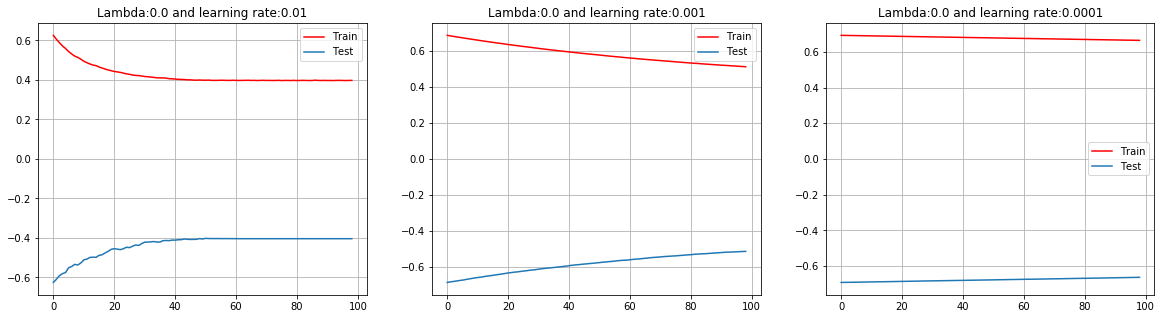

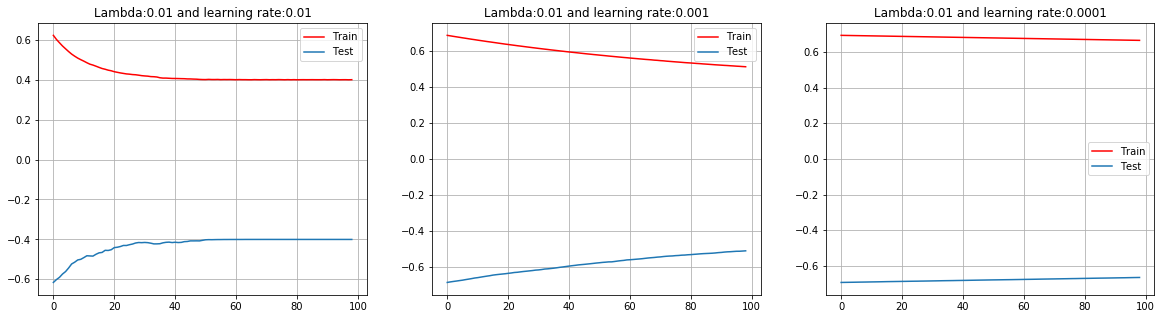

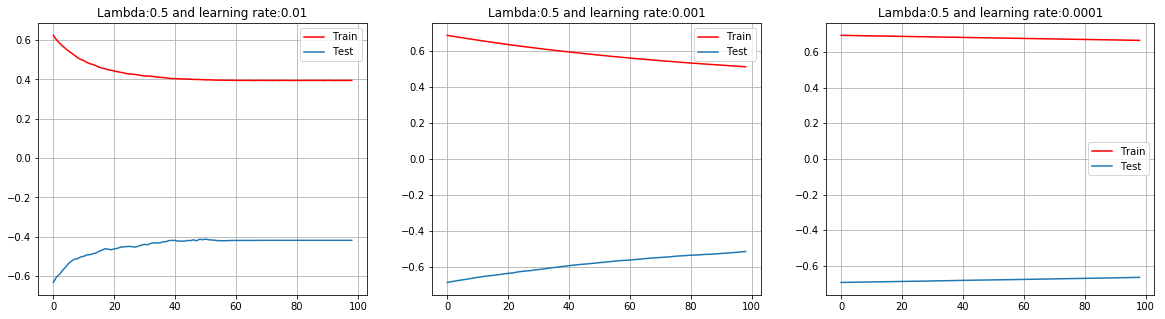

In [13]:
#Training logistic regression with L2 regularization using Dataset1

#setting list of variable hyperparameters
lambda_list = [0.00, 0.01, 0.5]
learning_rate_list = [0.01, 0.001, 0.0001] 

#renaming variables to feed the function
X_train = X_train_trans1
X_test = X_test_trans1
y_train = y_train1.values.reshape(-1,1)
y_test = y_test1.values.reshape(-1,1)
grad = grad_logistic_function
loss= logistic_loss

#setting fixed hyperparameters
minibatch_size = 50
max_iter = 100
n_train = X_train1.shape[0]
n_test = X_test1.shape[0]
m = X_train1.shape[1]

#looping over hyperparameters
for lambd in lambda_list:
    
    fix, ax = plt.subplots(1,3, figsize=(20,5))

    for i, learning_rate in enumerate(learning_rate_list):
        
        print("Fitting model with parameters lambda:", lambd, "and step-length:", learning_rate)

        train_loss_list, test_loss_list, beta = train_BGD(X_train, y_train , X_test, y_test, grad, learning_rate, loss, minibatch_size, max_iter, lambd)
    
        #scaling the train and loss
        train_loss_list = [i/n_train for i in train_loss_list]
        test_loss_list = [-i/n_test for i in test_loss_list]
        
        ax[i].plot(train_loss_list[1:], 'r')
        ax[i].plot(test_loss_list[1:])
        ax[i].legend(("Train", "Test"))
        ax[i].set_title("Lambda:"+str(lambd)+" and learning rate:"+str(learning_rate))
        ax[i].grid()

Fitting model with parameters lambda: 0.0 and step-length: 0.01
Fitting model with parameters lambda: 0.0 and step-length: 0.001
Fitting model with parameters lambda: 0.0 and step-length: 0.0001
Fitting model with parameters lambda: 0.01 and step-length: 0.01
Fitting model with parameters lambda: 0.01 and step-length: 0.001
Fitting model with parameters lambda: 0.01 and step-length: 0.0001
Fitting model with parameters lambda: 0.5 and step-length: 0.01
Fitting model with parameters lambda: 0.5 and step-length: 0.001
Fitting model with parameters lambda: 0.5 and step-length: 0.0001


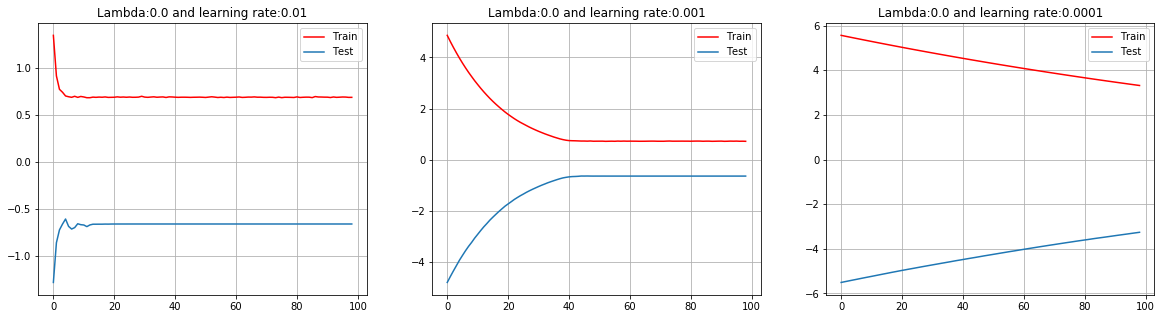

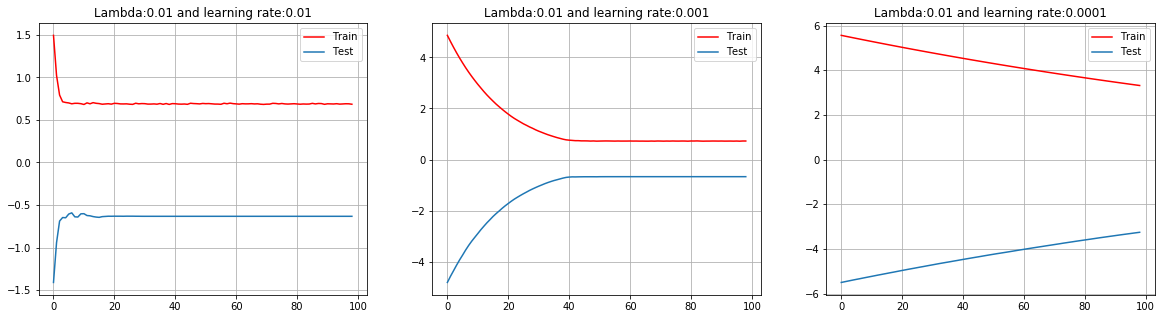

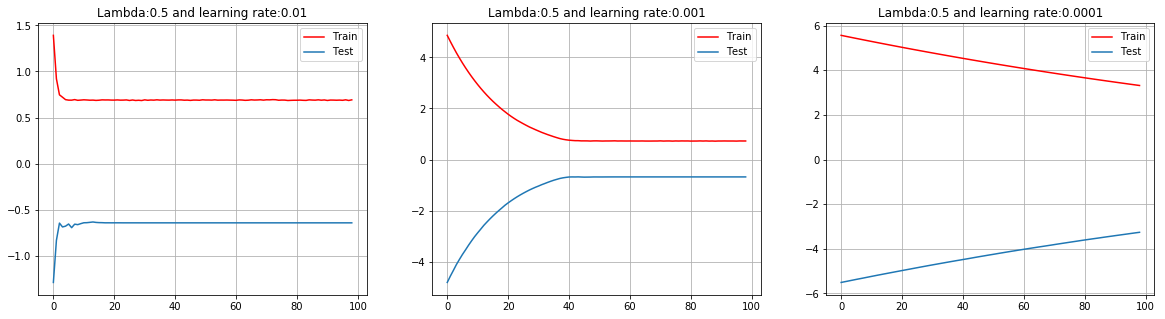

In [14]:
#Training lositic regression with L2 regularization using Dataset2

#Setting list of variable hyperparameters
lambda_list = [0.00, 0.01, 0.5]
learning_rate_list = [0.01, 0.001, 0.0001]

#renaming variables to feed the train function
X_train = X_train_trans2
X_test = X_test_trans2
y_train = y_train2.values.reshape(-1,1)
y_test = y_test2.values.reshape(-1,1)
grad = grad_linear_function
loss= linear_loss

#setting fixed parameters
minibatch_size = 50
max_iter = 100
n_train = X_train2.shape[0]
n_test = X_test2.shape[0]
m = X_train2.shape[1]

for lambd in lambda_list:
    
    fix, ax = plt.subplots(1,3, figsize=(20,5))

    for i, learning_rate in enumerate(learning_rate_list):
        
        print("Fitting model with parameters lambda:", lambd, "and step-length:", learning_rate)
        
        train_loss_list, test_loss_list, beta = train_BGD(X_train, y_train , X_test, y_test, grad, learning_rate, loss, minibatch_size, max_iter, lambd)
        
        test_loss_list = [-i for i in test_loss_list]
        
        ax[i].plot(train_loss_list[1:], 'r')
        ax[i].plot(test_loss_list[1:])
        ax[i].legend(("Train", "Test"))
        ax[i].set_title("Lambda:"+str(lambd)+" and learning rate:"+str(learning_rate))
        ax[i].grid()

Fitting model with parameters lambda: 0.0 and step-length: 0.01
Fitting model with parameters lambda: 0.0 and step-length: 0.001
Fitting model with parameters lambda: 0.0 and step-length: 0.0001
Fitting model with parameters lambda: 0.01 and step-length: 0.01
Fitting model with parameters lambda: 0.01 and step-length: 0.001
Fitting model with parameters lambda: 0.01 and step-length: 0.0001
Fitting model with parameters lambda: 0.5 and step-length: 0.01
Fitting model with parameters lambda: 0.5 and step-length: 0.001
Fitting model with parameters lambda: 0.5 and step-length: 0.0001


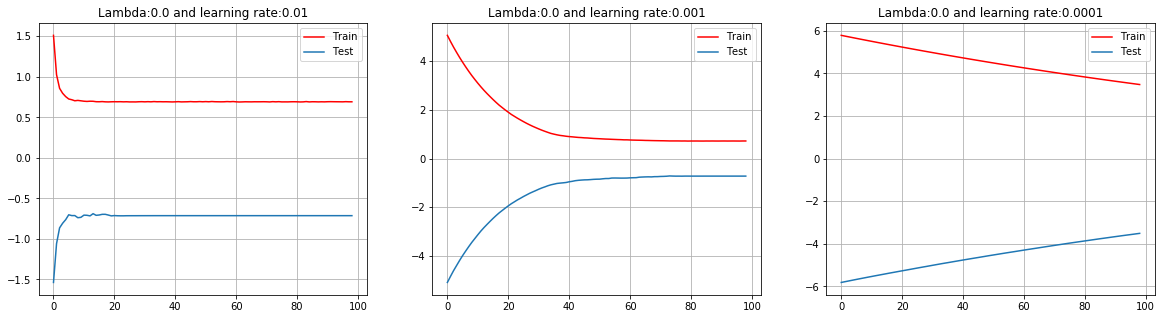

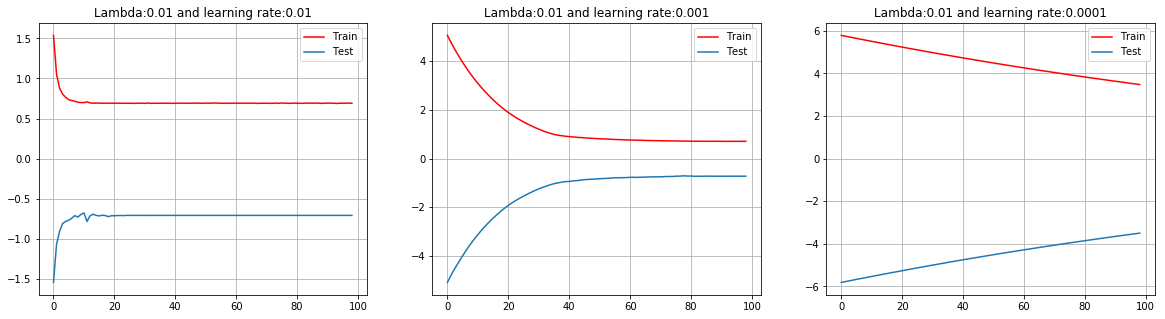

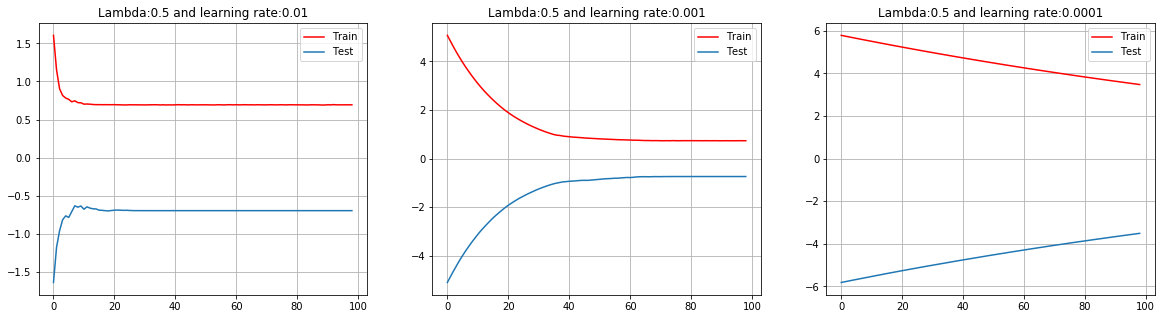

In [15]:
#Training lositic regression with L2 regularization using Dataset1

#setting list of variable hyperparameters
lambda_list = [0.00, 0.01, 0.5]
learning_rate_list = [0.01, 0.001, 0.0001]

#renaming important variables
X_train = X_train_trans3
X_test = X_test_trans3
y_train = y_train3.values.reshape(-1,1)
y_test = y_test3.values.reshape(-1,1)

#setting list of fixed hyperparameters
grad = grad_linear_function
loss= linear_loss
minibatch_size = 50
max_iter = 100
n_train = X_train3.shape[0]
n_test = X_test3.shape[0]
m = X_train3.shape[1]

for lambd in lambda_list:
    
    fix, ax = plt.subplots(1,3, figsize=(20,5))

    for i, learning_rate in enumerate(learning_rate_list):

        print("Fitting model with parameters lambda:", lambd, "and step-length:", learning_rate)
        
        train_loss_list, test_loss_list, beta = train_BGD(X_train, y_train , X_test, y_test, grad, learning_rate, loss, minibatch_size, max_iter, lambd)

        test_loss_list = [-i for i in test_loss_list]
        
        ax[i].plot(train_loss_list[1:], 'r')
        ax[i].plot(test_loss_list[1:])
        ax[i].legend(("Train", "Test"))
        ax[i].set_title("Lambda:"+str(lambd)+" and learning rate:"+str(learning_rate))
        ax[i].grid()

### K-Fold cross validation

In K-Fold cross validation, the dataset is divided in k different subsets.Then, K different models are trained, at each time one different fold is used as validation set and the rest are used to train. At the end, we get one metric of performance (loss) for each validation set, that means K different evaluations. Therefore, we take the mean over these K losses, to get the final loss, which should get very close to the one over the test set.

<img src="image_kfold.png">

We aim to perform 5-Fold validaiton over the three different datasets.

In [16]:
#5-Fold cross validation for dataset 1
#Setting fixed parameters
lambda_list = [0.00, 0.01, 0.5]
learning_rate_list = [0.0001, 0.001, 0.01]

#renaming variables to feed the function
X_train = X_train_trans1
X_test = X_test_trans1
y_train = y_train1.values.reshape(-1,1)
y_test = y_test1.values.reshape(-1,1)
grad = grad_logistic_function
loss= logistic_loss

#setting fixed parameters
minibatch_size = 50
max_iter = 100
n_train = X_train1.shape[0]
n_test = X_test1.shape[0]
m = X_train1.shape[1] 
idx = np.arange(n_train) #index to create fold
np.random.shuffle(idx)
k=5 #number of folds
folds = []
samples_fold = int(n_train/k)
mean_test_folds = [] #to save the test loss of the folds
hyperparameters = [] #to save the hyperparameters used

#creating the k-fold subsets
for k in range(k):
    
    folds.append((X_train[(k*samples_fold):((k+1)*samples_fold),:],
                   y_train[(k*samples_fold):((k+1)*samples_fold)]))


for lambd in lambda_list:
    for i, learning_rate in enumerate(learning_rate_list):
        
        print("K-Fold validation for model with parameters lambda:", lambd, "and step-length:", learning_rate)
        
        test_loss_folds = []
        
        for f in range(k):

            folds_list = list(range(k+1))
            folds_list.pop(f)

            #selecting test dataset
            X_test_fold = folds[f][0]
            y_test_fold = folds[f][1]

            #merging the folds to create the training dataset
            X_train_fold = folds[folds_list[1]][0]   
            y_train_fold = folds[folds_list[1]][1]
            
            for j in folds_list[1:]:
                X_train_fold = np.vstack((X_train_fold, folds[j][0]))
                y_train_fold = np.vstack((y_train_fold, folds[j][1]))


            train_loss_list, test_loss_list, beta = train_BGD(X_train_fold, y_train_fold , X_test_fold, y_test_fold, grad, learning_rate, loss, minibatch_size, max_iter, lambd)
            
            test_loss_list = [i/n_test for i in test_loss_list]

            test_loss_folds.append(test_loss_list[-1])
        mean_test_folds.append(np.mean(test_loss_folds))
        hyperparameters.append([lambd,learning_rate])

df = pd.DataFrame( {'RMSE': mean_test_folds ,
                    'Lambda': np.array(hyperparameters)[:,0],
                    'Learning rate': np.array(hyperparameters)[:,1]})

df

K-Fold validation for model with parameters lambda: 0.0 and step-length: 0.0001
K-Fold validation for model with parameters lambda: 0.0 and step-length: 0.001
K-Fold validation for model with parameters lambda: 0.0 and step-length: 0.01
K-Fold validation for model with parameters lambda: 0.01 and step-length: 0.0001
K-Fold validation for model with parameters lambda: 0.01 and step-length: 0.001
K-Fold validation for model with parameters lambda: 0.01 and step-length: 0.01
K-Fold validation for model with parameters lambda: 0.5 and step-length: 0.0001
K-Fold validation for model with parameters lambda: 0.5 and step-length: 0.001
K-Fold validation for model with parameters lambda: 0.5 and step-length: 0.01


,Lambda,Learning rate,RMSE
0,0.00,0.0001,0.525089
1,0.00,0.0010,0.379140
2,0.00,0.0100,0.296843
3,0.01,0.0001,0.525103
4,0.01,0.0010,0.378933
5,0.01,0.0100,0.297724
6,0.50,0.0001,0.525059
7,0.50,0.0010,0.379068
8,0.50,0.0100,0.295089


From the table we can see that the best model is with parameters: $\lambda$=0.5 and step-lengtgh=0.01. We train a final model with the train dataset and test it on the train dataset.

In [25]:
learning_rate = 0.01
lambd = 0.5
X_train = X_train_trans1
X_test = X_test_trans1
y_train = y_train1.values.reshape(-1,1)
y_test = y_test1.values.reshape(-1,1)
grad = grad_logistic_function
loss= logistic_loss
n_test = X_test1.shape[0]

train_loss_list, test_loss_list, beta = train_BGD(X_train, y_train , X_test, y_test, grad, learning_rate, loss, minibatch_size, max_iter, lambd)
print("Test loss: ", test_loss_list[-1]/n_test  )


Test loss:  0.417391696188


In [18]:
#5-Fold cross validation for dataset 2
#Setting fixed parameters
lambda_list = [0.00, 0.01, 0.5]
learning_rate_list = [0.0001, 0.001, 0.01]

#renaming variables to feed the function
X_train = X_train_trans2
X_test = X_test_trans2
y_train = y_train2.values.reshape(-1,1)
y_test = y_test2.values.reshape(-1,1)
grad = grad_linear_function
loss= linear_loss

#setting fixed parameters
minibatch_size = 50
max_iter = 100
n_train = X_train2.shape[0]
n_test = X_test2.shape[0]
m = X_train2.shape[1]
idx = np.arange(n_train)
np.random.shuffle(idx)
k=5
folds = []
samples_fold = int(n_train/k)

#creating the k-fold subsets
for k in range(k):
    
    folds.append((X_train[(k*samples_fold):((k+1)*samples_fold),:],
                   y_train[(k*samples_fold):((k+1)*samples_fold)]))

folds_list = list(range(k+1))

mean_test_folds = []
hyperparameters = []

for lambd in lambda_list:
    for i, learning_rate in enumerate(learning_rate_list):
        
        test_loss_folds = []
        print("K-Fold validation for model with parameters lambda:", lambd, "and step-length:", learning_rate)

        for f in range(k):

            folds_list = list(range(k+1))
            folds_list.pop(f)

            #selecting test dataset
            X_test_fold = folds[f][0]
            y_test_fold = folds[f][1]

            #merging the folds to create the training dataset
            X_train_fold = folds[folds_list[1]][0]   
            y_train_fold = folds[folds_list[1]][1]
            
            for j in folds_list[1:]:
                X_train_fold = np.vstack((X_train_fold, folds[j][0]))
                y_train_fold = np.vstack((y_train_fold, folds[j][1]))


            train_loss_list, test_loss_list, beta = train_BGD(X_train_fold, y_train_fold , X_test_fold, y_test_fold, grad, learning_rate, loss, minibatch_size, max_iter, lambd)
            
            test_loss_folds.append(test_loss_list[-1])

        #saving the mest on the training set
        mean_test_folds.append(np.mean(test_loss_folds))
        hyperparameters.append([lambd,learning_rate])

df = pd.DataFrame( {'RMSE': mean_test_folds ,
                    'Lambda': np.array(hyperparameters)[:,0],
                    'Learning rate': np.array(hyperparameters)[:,1]})

df

K-Fold validation for model with parameters lambda: 0.0 and step-length: 0.0001
K-Fold validation for model with parameters lambda: 0.0 and step-length: 0.001
K-Fold validation for model with parameters lambda: 0.0 and step-length: 0.01
K-Fold validation for model with parameters lambda: 0.01 and step-length: 0.0001
K-Fold validation for model with parameters lambda: 0.01 and step-length: 0.001
K-Fold validation for model with parameters lambda: 0.01 and step-length: 0.01
K-Fold validation for model with parameters lambda: 0.5 and step-length: 0.0001
K-Fold validation for model with parameters lambda: 0.5 and step-length: 0.001
K-Fold validation for model with parameters lambda: 0.5 and step-length: 0.01


,Lambda,Learning rate,RMSE
0,0.00,0.0001,3.291882
1,0.00,0.0010,0.713640
2,0.00,0.0100,0.682666
3,0.01,0.0001,3.295341
4,0.01,0.0010,0.711141
5,0.01,0.0100,0.679307
6,0.50,0.0001,3.293145
7,0.50,0.0010,0.709650
8,0.50,0.0100,0.680417


From the table we can see that the best model is with parameters: $\lambda$=0.01 and step-lengtgh=0.01. We train a final model with the train dataset and test it on the train dataset.



In [26]:
learning_rate = 0.01
lambd = 0.01
X_train = X_train_trans2
X_test = X_test_trans2
y_train = y_train2.values.reshape(-1,1)
y_test = y_test2.values.reshape(-1,1)
grad = grad_linear_function
loss= linear_loss

train_loss_list, test_loss_list, beta = train_BGD(X_train, y_train , X_test, y_test, grad, learning_rate, loss, minibatch_size, max_iter, lambd)
print("Test loss: ", test_loss_list[-1]  )

Test loss:  0.658520547433


In [20]:
#5-Fold cross validation for dataset 2

#Setting fixed parameters
lambda_list = [ 0.00, 0.01, 0.5]
learning_rate_list = [0.0001, 0.001, 0.01]

#renaming variables to feed the function
X_train = X_train_trans3
X_test = X_test_trans3
y_train = y_train3.values.reshape(-1,1)
y_test = y_test3.values.reshape(-1,1)
grad = grad_linear_function
loss= linear_loss

#creating the k-fold subsets
minibatch_size = 50
max_iter = 100
n_train = X_train3.shape[0]
n_test = X_test3.shape[0]
m = X_train3.shape[1]
idx = np.arange(n_train)
np.random.shuffle(idx)
k=5
folds = []
samples_fold = int(n_train/k)

#creating the k-fold subsets
for k in range(k):
    
    folds.append((X_train[(k*samples_fold):((k+1)*samples_fold),:],
                   y_train[(k*samples_fold):((k+1)*samples_fold)]))


mean_test_folds = []
hyperparameters = []
for lambd in lambda_list:
    for i, learning_rate in enumerate(learning_rate_list):
        
        print("K-Fold validation for model with parameters lambda:", lambd,  "and step-length:", learning_rate)
        test_loss_folds = []
        
        for f in range(k):

            folds_list = list(range(k+1))
            folds_list.pop(f)

            #selecting test dataset
            X_test_fold = folds[f][0]
            y_test_fold = folds[f][1]

            #merging the folds to create the training dataset
            X_train_fold = folds[folds_list[1]][0]   
            y_train_fold = folds[folds_list[1]][1]
            
            for j in folds_list[1:]:
                X_train_fold = np.vstack((X_train_fold, folds[j][0]))
                y_train_fold = np.vstack((y_train_fold, folds[j][1]))

            train_loss_list, test_loss_list, beta = train_BGD(X_train_fold, y_train_fold , X_test_fold, y_test_fold, grad, learning_rate, loss, minibatch_size, max_iter, lambd)
            
            test_loss_folds.append(test_loss_list[-1])

        mean_test_folds.append(np.mean(test_loss_folds))
        hyperparameters.append([lambd,learning_rate])

df = pd.DataFrame( {'RMSE': mean_test_folds ,
                    'Lambda': np.array(hyperparameters)[:,0],
                    'Learning rate': np.array(hyperparameters)[:,1]})

df

K-Fold validation for model with parameters lambda: 0.0 and step-length: 0.0001
K-Fold validation for model with parameters lambda: 0.0 and step-length: 0.001
K-Fold validation for model with parameters lambda: 0.0 and step-length: 0.01
K-Fold validation for model with parameters lambda: 0.01 and step-length: 0.0001
K-Fold validation for model with parameters lambda: 0.01 and step-length: 0.001
K-Fold validation for model with parameters lambda: 0.01 and step-length: 0.01
K-Fold validation for model with parameters lambda: 0.5 and step-length: 0.0001
K-Fold validation for model with parameters lambda: 0.5 and step-length: 0.001
K-Fold validation for model with parameters lambda: 0.5 and step-length: 0.01


,Lambda,Learning rate,RMSE
0,0.00,0.0001,3.446127
1,0.00,0.0010,0.703714
2,0.00,0.0100,0.672643
3,0.01,0.0001,3.444786
4,0.01,0.0010,0.702695
5,0.01,0.0100,0.675044
6,0.50,0.0001,3.445157
7,0.50,0.0010,0.699267
8,0.50,0.0100,0.673042


From the table we can see that the best model is with parameters: $\lambda$=0.0 and step-lengtgh=0.01. We train a final model with the train dataset and test it on the train dataset.

In [28]:
learning_rate = 0.01
lambd = 0.0
X_train = X_train_trans3
X_test = X_test_trans3
y_train = y_train3.values.reshape(-1,1)
y_test = y_test3.values.reshape(-1,1)
grad = grad_linear_function
loss= linear_loss

train_loss_list, test_loss_list, beta = train_BGD(X_train, y_train , X_test, y_test, grad, learning_rate, loss, minibatch_size, max_iter, lambd)
print("Test loss: ", test_loss_list[-1] )

Test loss:  0.719175698499


Using k-fold cross validation to perform the grid seach permits to see better wich are the best set of hyperparameters. The graphics that we drew in the first exercise did show that with the L2 regularization, the model could lower the test error. However, with K-fold cross validation, we obtain results more consistent that are less prone to variability, and therefore, thorugh k-Fold corss validation we are able to predict better how the model will perform in new data (test-data).

### Conclusions

* About Mini-batch: mini-btach turns out to be a good trade-off between stocastich and btach gradient descent. It does not use the whole dataset (as btach gradient descent does), but it still makes good improvements since it uses a subset (and not only one sample).
* About ridge regression: Ridge regression and methods using L2 Normalization are good to achieve models that performs better on test data, it means, generalize better.
* About grid search: it is very cost-expensive but still a proper way to explore the space of possible set of hyperparameters. However, it could be a problem if the used dataset is big.
* About cross validaiton: with k-fold cross validation we are able to estimate better the error of the model on new unseen data, therefore it is a good way to pick hyperparameters.

### References

* [1] Some methdologies and concepts reviewed and taken from: Machine Learning Course in Coursera. https://es.coursera.org/learn/machine-learning 
* [2] Image of K-Fold cross validation: Automatic Segmentation of Indoor and Outdoor Scenes from Visual Lifelogging - Scientific Figure on ResearchGate. Available from: https://www.researchgate.net/figure/An-example-of-a-10-fold-cross-validation-cro17_fig1_322509110 [accessed 8 Dec, 2018]